In [1]:
import os

In [4]:
train_dir = 'data/train/'
test_dir = 'data/test/'

In [5]:
train_imgs = os.listdir(train_dir)
print(train_imgs[:5])

['84accc2dc9f5bb3ebee89fe1bf23639c.jpg', '14cffe576239620f1733dfe487dbaa6f.jpg', 'cc93915e06bc55626a02af95006a48c2.jpg', '6f9bac41b5be5ee6baecc9e7ef8f2c2a.jpg', '64dd586a1d08937d20618233df2e5dbc.jpg']


In [6]:
test_imgs = os.listdir(test_dir)
print(test_imgs[:5])

['266490a2b053a4a3bf68e779f28fb5a9.jpg', 'dae9fd18836d8df20989ef0101771d4b.jpg', '079a40f22b0fad9a66f76797b62bb930.jpg', 'ab8462f9a501d362041d47582fddc9ad.jpg', '8895089b432e020cc42e6262b5a1c2dd.jpg']


In [73]:
train_paths = [os.path.join(train_dir, filename) for filename in train_imgs]
print(train_paths[:5])

['data/train/84accc2dc9f5bb3ebee89fe1bf23639c.jpg', 'data/train/14cffe576239620f1733dfe487dbaa6f.jpg', 'data/train/cc93915e06bc55626a02af95006a48c2.jpg', 'data/train/6f9bac41b5be5ee6baecc9e7ef8f2c2a.jpg', 'data/train/64dd586a1d08937d20618233df2e5dbc.jpg']


In [74]:
test_paths = [os.path.join(test_dir, filename) for filename in test_imgs]
print(test_paths[:5])

['data/test/266490a2b053a4a3bf68e779f28fb5a9.jpg', 'data/test/dae9fd18836d8df20989ef0101771d4b.jpg', 'data/test/079a40f22b0fad9a66f76797b62bb930.jpg', 'data/test/ab8462f9a501d362041d47582fddc9ad.jpg', 'data/test/8895089b432e020cc42e6262b5a1c2dd.jpg']


In [75]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [76]:
image_size = 224

In [77]:
def read_and_prep_imgs(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

In [8]:
from tensorflow.python.keras.applications import ResNet50

/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
my_model = ResNet50(weights='input/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_imgs(train_paths[:5])
preds = my_model.predict(test_data)

NameError: name 'read_and_prep_imgs' is not defined

In [57]:
preds[0][:5]

array([5.4981460e-11, 1.9899080e-10, 1.3500304e-08, 1.2476252e-10,
       1.1069435e-08], dtype=float32)

In [58]:
from IPython.display import Image, display

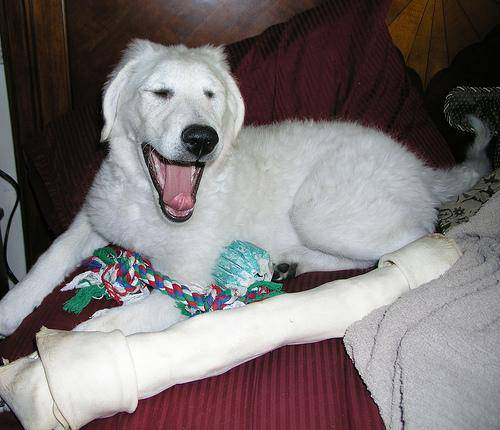

Class: 222 with Probabilty: 0.919125


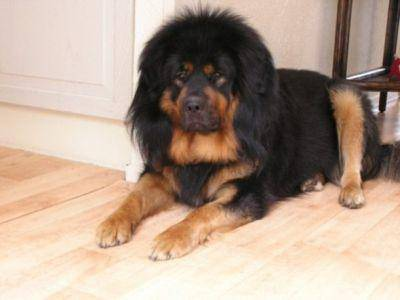

Class: 244 with Probabilty: 0.99533504


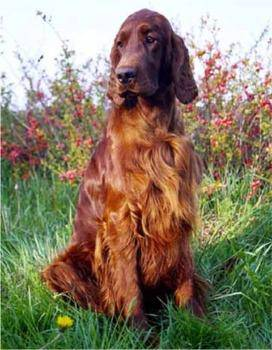

Class: 213 with Probabilty: 0.7659881


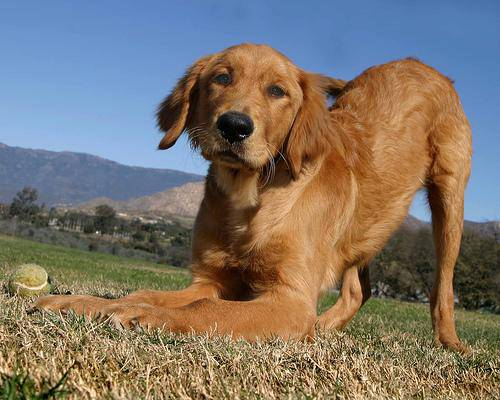

Class: 207 with Probabilty: 0.5549942


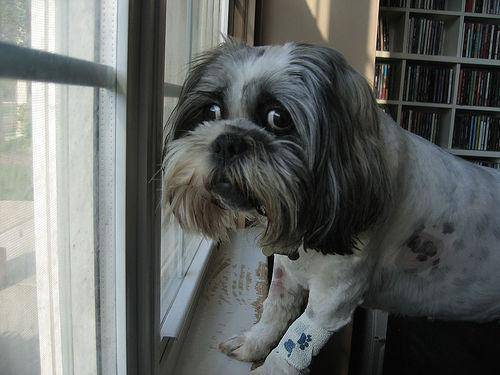

Class: 204 with Probabilty: 0.9075404


In [65]:
for i, train_path in enumerate(train_paths[:5]):
    display(Image(train_path))
    print("Class: " + str(list(preds[i]).index(max(preds[i]))) + " with Probabilty: " + str(max(preds[i])))